## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Final Project Submission - Phase 1 Project

# Student Name: KIM, Jae Heon
# Student Pace: Full Time, NYC
# Schedule Project Review Date/Time:
# Instructor Name: Brendan Hutchinson
# Blog post URL: https://medium.com/@jaeheonk817

In [2]:
# Import all the statistical packages necessary for this project.

import pandas as pd
import numpy as np
import sqlite3
import ast

# Import all the data visualization packages necessary for this project.

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
# Turn all CSV and TSV files into Pandas Dataframe to develope further studies.

bom_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [4]:
!ls zippedData

bom.movie_gross.csv.gz  im.db2                  rt.reviews.tsv.gz
im.db                   im.db3                  tmdb.movies.csv.gz
im.db.zip               rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


In [5]:
%%bash

sqlite3 zippedData/im.db3
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [6]:
# Turn db file into Pandas Dataframe

# Exctract zipped file


# Get connection to the database. Check if multiple tables exist.
conn = sqlite3.connect('zippedData/im.db3')
cursor_obj = conn.cursor()
cursor_obj.execute("SELECT name from sqlite_master where type='table';")
print(cursor_obj.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [7]:
# Turn db file into Pandas Dataframe

# Explore each of 8 tables individually to determine which are useful for this project.
survey1_df = pd.read_sql("SELECT * FROM movie_basics", conn)
survey2_df = pd.read_sql("SELECT * FROM directors", conn)
survey3_df = pd.read_sql("SELECT * FROM known_for", conn)
survey4_df = pd.read_sql("SELECT * FROM movie_akas", conn)
survey5_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
survey6_df = pd.read_sql("SELECT * FROM persons", conn)
survey7_df = pd.read_sql("SELECT * FROM principals", conn)
survey8_df = pd.read_sql("SELECT * FROM writers", conn)

# After brief survey of each table, only survey1_df and survey5_df are wanted.
# Join these two tables using SQL for simplification.
imdb_df = pd.read_sql("""
    SELECT *
    FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mb.movie_id = mr.movie_id
""", conn)

In [8]:
# Project Objectives:
#
# This project's objectives is to provide recommendations on Microsoft's studio business.
# Steps to be taken are following:
#
# 1. Clean the data so that it's ready for use.
# 2. Compute Profit, Return on Investment, and Profitability.
# 3. Study each aspect of above with respect to the size of budget.
# 4. Find optimal budget size for Microsoft and judge whether its reasonable.
# 5. Find optimal runtime for movies.
# 6. Find genres for which specific suggestions can be made to.


In [9]:
# Take a look at each dataframe.

imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [10]:
# Take a look at each dataframe.

bom_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [11]:
# Take a look at each dataframe.

tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
# Take a look at each dataframe.

tn_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [13]:
# Clean tn_budgets_df.
# Select only necessary columns and change their data type, names to further develope studies.
selected_columns = ['release_date', 'movie', 'production_budget', 'worldwide_gross']
tn = tn_budgets_df[selected_columns]
tn = tn.rename(columns = {'release_date':'Date', 'movie':'Movie',
                         'production_budget':'Budget', 'worldwide_gross':'Revenue'})
tn['Revenue'] = pd.to_numeric(tn['Revenue'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['Budget'] = pd.to_numeric(tn['Budget'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['Movie'] = tn['Movie'].astype(str)
tn['Date'] = pd.to_datetime(tn['Date'])

# It is impossible for a movie's revenue to be 0.
# Assume those entries are unavailable data and drop them from the dataframe.
tn = tn[tn.Revenue != 0]

# Simplify the release time by just keeping the year of release.
tn['Year'] = tn['Date'].dt.strftime('%Y')
tn = tn.drop('Date', axis=1)

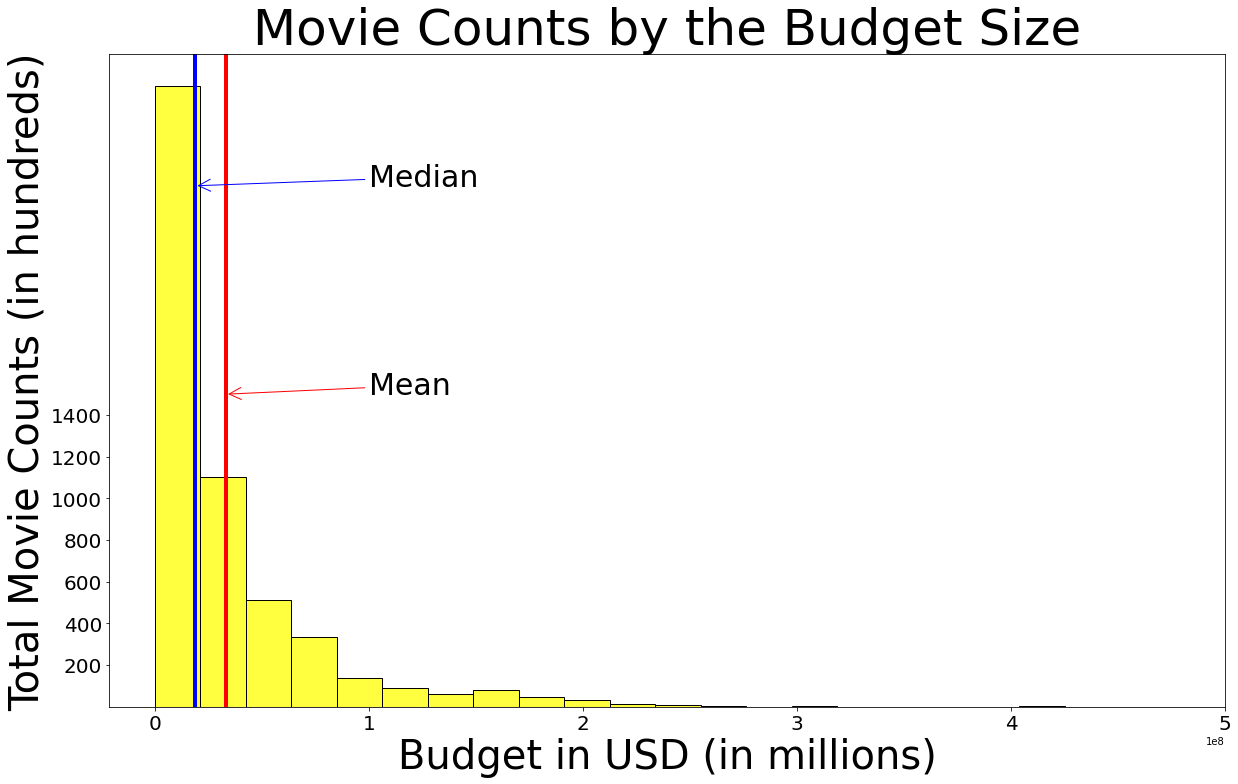

In [14]:
# Study the budget size to work only with the data application to Microsoft scenario.
# Microsoft sits on one of the largest cash reserves as a company.
# Evaluate mean and median of the budget cost.

fig, ax = plt.subplots(figsize=(20, 12))
sns.histplot(x=tn['Budget'], data=tn, bins=20, color='yellow')
plt.title("Movie Counts by the Budget Size", fontsize=50)
plt.xlabel("Budget in USD (in millions)", fontsize=40)
plt.ylabel("Total Movie Counts (in hundreds)", fontsize=40)
plt.axvline(tn['Budget'].mean(), color='r', linestyle='-', linewidth=4)
plt.axvline(tn['Budget'].median(), color='b', linestyle='-', linewidth=4)
plt.annotate('Mean', xy=(tn['Budget'].mean(), 1500), xytext=(100000000, 1500),
             fontsize=30, arrowprops={'arrowstyle': '->', 'color': 'red'})
plt.annotate('Median', xy=(tn['Budget'].median(), 2500), xytext=(100000000, 2500),
             fontsize=30, arrowprops={'arrowstyle': '->', 'color': 'b'})
plt.xticks(range(0,600000000,100000000),fontsize=20)
plt.yticks(range(200,1600,200), fontsize=20)
plt.show()

In [15]:
# Compute descriptive statistics on the budget.

print('Mean Budget:             ' + str(round(tn['Budget'].mean(), 3)))
print('Maximum Budget:          ' + str(round(tn['Budget'].max(), 3)))
print('Minimum Budget:          ' + str(round(tn['Budget'].min(), 3)))
print('25th Percentile Budget:  ' + str(round(tn['Budget'].quantile(0.25), 3)))
print('Median Budget:           ' + str(round(tn['Budget'].median(), 3)))
print('75th Percentile Budget:  ' + str(round(tn['Budget'].quantile(0.75), 3)))


Mean Budget:             33308006.085
Maximum Budget:          425000000
Minimum Budget:          1100
25th Percentile Budget:  6000000.0
Median Budget:           19000000.0
75th Percentile Budget:  42000000.0


In [16]:
# Find profit of each movie.
tn['Profit'] = tn['Revenue']-tn['Budget']

# ROI (Return on Investment) is a very important indicator of financial success.
tn['ROI'] = tn['Profit']/tn['Budget']

# Create a new column called 'Budget Level' that has four categoris:
#   'super low', 'low', 'medium' and 'high' by cutting them on each quantile range.
tn['Budget Level'] = pd.cut(tn['Budget'], 
                       bins=[tn['Budget'].min(),tn['Budget'].quantile(0.25),tn['Budget'].quantile(0.5),tn['Budget'].quantile(0.75),tn['Budget'].max()], 
                       labels=['super low','low','medium','high'])

# Define a new column called 'Profitability' that returns 'profit' if ROI is positive,
# 'loss' is ROI is negative.
tn['Profitability'] = tn['ROI'].apply(lambda x: 'profit' if x > 0 else 'loss')

In [17]:
# Sort the ROI values in descending order.
# See the top 54 values (top 1%).

tn = tn.sort_values(by='ROI', ascending = False)
tn.head(54)

,Movie,Budget,Revenue,Year,Profit,ROI,Budget Level,Profitability
5745,Deep Throat,25000,45000000,1972,44975000,1799.000000,super low,profit
5613,Mad Max,200000,99750000,1980,99550000,497.750000,super low,profit
5492,Paranormal Activity,450000,194183034,2009,193733034,430.517853,super low,profit
5679,The Gallows,100000,41656474,2015,41556474,415.564740,super low,profit
5406,The Blair Witch Project,600000,248300000,1999,247700000,412.833333,super low,profit
5709,Super Size Me,65000,22233808,2004,22168808,341.058585,super low,profit
5346,Bambi,858000,268000000,1942,267142000,311.354312,super low,profit
5773,El Mariachi,7000,2041928,1993,2034928,290.704000,super low,profit
5676,Night of the Living Dead,114000,30087064,1968,29973064,262.921614,super low,profit
5210,Rocky,1000000,225000000,1976,224000000,224.000000,super low,profit


In [18]:
# As expected, most of them have extremely low budget, not relevant for Microsoft.
# Also, most of them are very old and thus will be dropped from tn.

tn = tn[tn.ROI <= 56.508517]

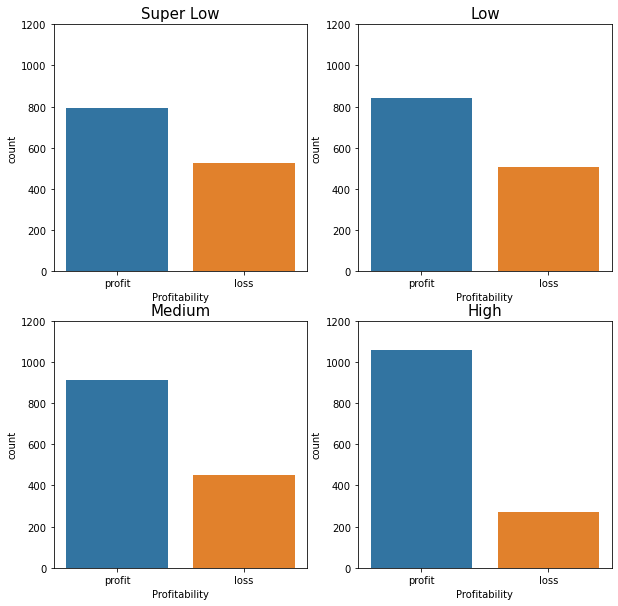

In [19]:
# Draw a countplot for each budget category to show how much more a movie is likely to
# yield profit given the budget category

fig, ax = plt.subplots(2, 2, figsize=(10, 10))


sns.countplot(x=tn[tn['Budget Level'] == 'super low']['Profitability'], ax = ax[0,0])
ax[0,0].set_title("Super Low", fontsize=15)
ax[0,0].set(ylim=(0, 1200))

sns.countplot(x=tn[tn['Budget Level'] == 'low']['Profitability'], ax=ax[0,1])
ax[0,1].set_title("Low", fontsize=15)
ax[0,1].set(ylim=(0, 1200))

sns.countplot(x=tn[tn['Budget Level'] == 'medium']['Profitability'], ax=ax[1,0])
ax[1,0].set_title("Medium", fontsize=15)
ax[1,0].set(ylim=(0, 1200))

sns.countplot(x=tn[tn['Budget Level'] == 'high']['Profitability'], ax=ax[1,1])
ax[1,1].set_title("High", fontsize=15)
ax[1,1].set(ylim=(0, 1200))

plt.show()

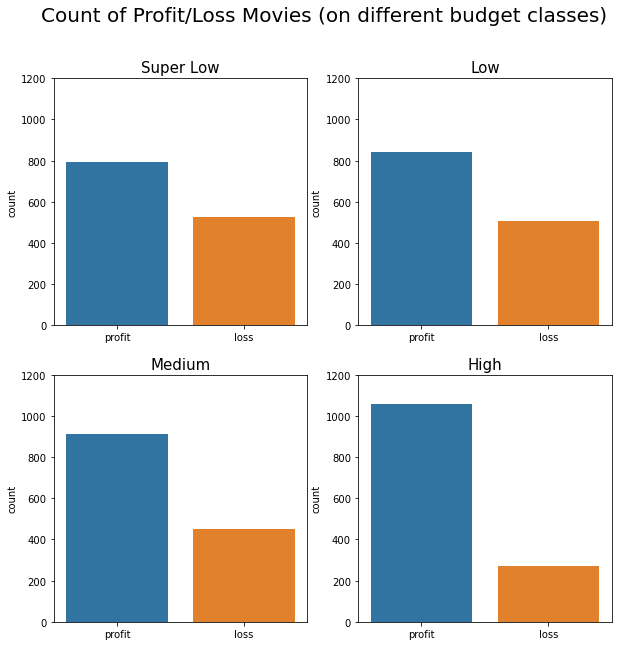

In [20]:
# This graph shows that at high budget level, movies yield the best financial results.
# Name the super-title and get rid of unnecessary information for easier visualization.
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Count of Profit/Loss Movies (on different budget classes)',
             fontsize=20)

sns.countplot(x=tn[tn['Budget Level'] == 'super low']['Profitability'], ax = ax[0,0])
ax[0,0].set_title("Super Low", fontsize=15)
ax[0,0].set_xlabel("")
ax[0,0].set(ylim=(0, 1200))

sns.countplot(x=tn[tn['Budget Level'] == 'low']['Profitability'], ax=ax[0,1])
ax[0,1].set_title("Low", fontsize=15)
ax[0,1].set_xlabel("")
ax[0,1].set(ylim=(0, 1200))

sns.countplot(x=tn[tn['Budget Level'] == 'medium']['Profitability'], ax=ax[1,0])
ax[1,0].set_title("Medium", fontsize=15)
ax[1,0].set_xlabel("")
ax[1,0].set(ylim=(0, 1200))

sns.countplot(x=tn[tn['Budget Level'] == 'high']['Profitability'], ax=ax[1,1])
ax[1,1].set_title("High", fontsize=15)
ax[1,1].set_xlabel("")
ax[1,1].set(ylim=(0, 1200))

plt.show()
fig.savefig('bar_profitloss.png')

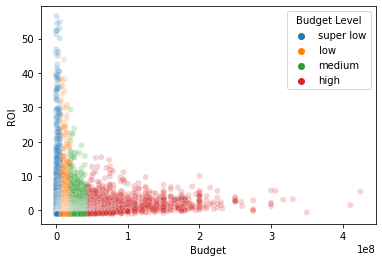

In [21]:
# Draw the scatterplot with different budget categories visualized differently.

sns.scatterplot(x='Budget', y='ROI', data=tn, hue='Budget Level', alpha=0.2)
plt.show()

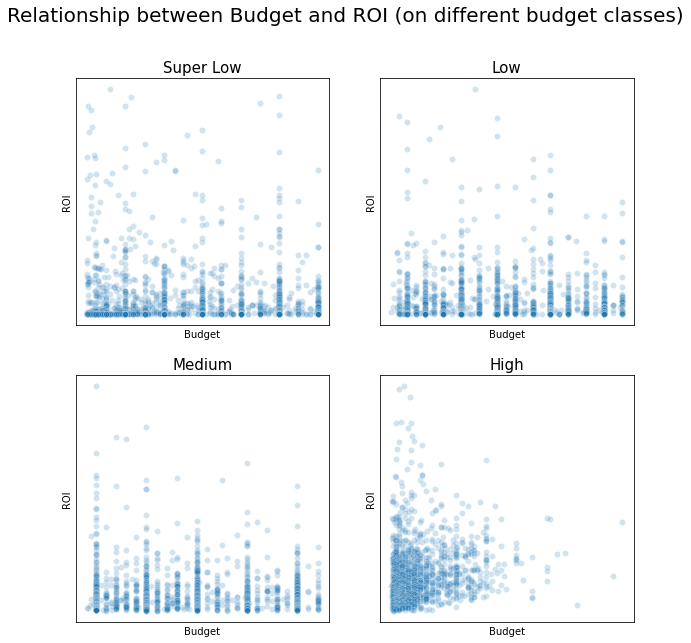

In [22]:
# Not much discovery can be drawn from the above graph.
# Draw a scatter plot for each budget category individually.
# We are interested in pattern of the distribution only.


fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Relationship between Budget and ROI (on different budget classes)',
             fontsize=20)
sns.scatterplot(x="Budget", y="ROI", alpha=0.2,
                data=tn[tn['Budget Level'] == 'super low'], ax=ax[0,0])
ax[0,0].set_title("Super Low", fontsize=15)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

sns.scatterplot(x="Budget", y="ROI", alpha=0.2,
                data=tn[tn['Budget Level'] == 'low'], ax=ax[0,1])
ax[0,1].set_title("Low", fontsize=15)
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])

sns.scatterplot(x="Budget", y="ROI", alpha=0.2,
                data=tn[tn['Budget Level'] == 'medium'], ax=ax[1,0])
ax[1,0].set_title("Medium", fontsize=15)
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

sns.scatterplot(x="Budget", y="ROI", alpha=0.2,
                data=tn[tn['Budget Level'] == 'high'], ax=ax[1,1])
ax[1,1].set_title("High", fontsize=15)
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])

plt.show()
fig.savefig('scatter_budgetROI.png')

In [23]:
# High Budget movies have visually distinct distribution shape.
# Let's compute Pearson's correlation coefficient for each budget category.

r_slowbud = tn[tn['Budget Level'] == 'super low']['Budget'].corr(tn[tn['Budget Level'] == 'super low']['ROI'])
r_lowbud = tn[tn['Budget Level'] == 'low']['Budget'].corr(tn[tn['Budget Level'] == 'low']['ROI'])
r_medbud = tn[tn['Budget Level'] == 'medium']['Budget'].corr(tn[tn['Budget Level'] == 'medium']['ROI'])
r_highbud = tn[tn['Budget Level'] == 'high']['Budget'].corr(tn[tn['Budget Level'] == 'high']['ROI'])

print('Super-Low-Budget and ROI\'s correlation:  ' + str(round(r_slowbud, 3)))
print('Low-Budget and ROI\'s correlation:        ' + str(round(r_lowbud, 3)))
print('Medium-Budget and ROI\'s correlation:     ' + str(round(r_medbud, 3)))
print('High-Budget and ROI\'s correlation:       ' + str(round(r_highbud, 3)))

Super-Low-Budget and ROI's correlation:  -0.065
Low-Budget and ROI's correlation:        -0.034
Medium-Budget and ROI's correlation:     -0.049
High-Budget and ROI's correlation:       0.143


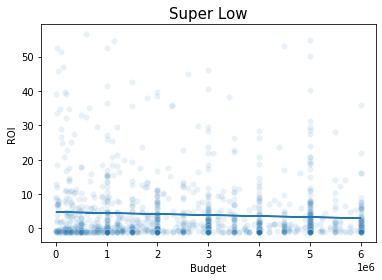

In [24]:
# Draw a linear regression on the already established scatterplot on Super Low.

fig, ax = plt.subplots()
x = tn[tn['Budget Level'] == 'super low']['Budget']
y = tn[tn['Budget Level'] == 'super low']['ROI']
slope,intercept,r_value,p_value,std_err = linregress(x, y)
line = [slope*xi + intercept for xi in x]
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.plot(x, line)
plt.title("Super Low", fontsize=15)
plt.show()
fig.savefig('slow_scatter_profitloss.png')

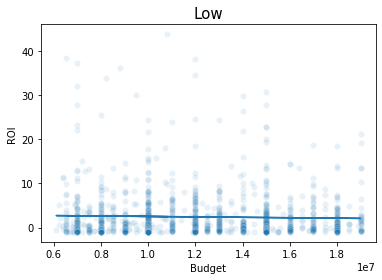

In [25]:
# Draw a linear regression on the already established scatterplot on Low.

fig, ax = plt.subplots()
x = tn[tn['Budget Level'] == 'low']['Budget']
y = tn[tn['Budget Level'] == 'low']['ROI']
slope,intercept,r_value,p_value,std_err = linregress(x, y)
line = [slope*xi + intercept for xi in x]
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.plot(x, line)
plt.title("Low", fontsize=15)
plt.show()
fig.savefig('low_scatter_profitloss.png')

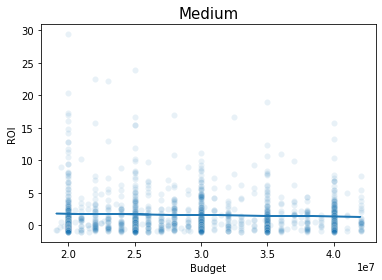

In [26]:
# Draw a linear regression on the already established scatterplot on Medium.

fig, ax = plt.subplots()
x = tn[tn['Budget Level'] == 'medium']['Budget']
y = tn[tn['Budget Level'] == 'medium']['ROI']
slope,intercept,r_value,p_value,std_err = linregress(x, y)
line = [slope*xi + intercept for xi in x]
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.plot(x, line)
plt.title("Medium", fontsize=15)
plt.show()
fig.savefig('medium_scatter_profitloss.png')

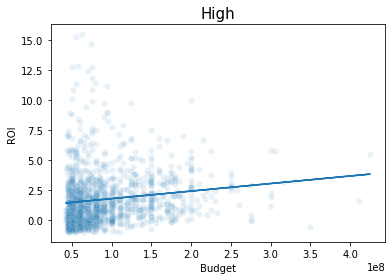

In [27]:
# Draw a linear regression on the already established scatterplot on High.

fig, ax = plt.subplots()
x = tn[tn['Budget Level'] == 'high']['Budget']
y = tn[tn['Budget Level'] == 'high']['ROI']
slope,intercept,r_value,p_value,std_err = linregress(x, y)
line = [slope*xi + intercept for xi in x]
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.plot(x, line)
plt.title("High", fontsize=15)
plt.show()
fig.savefig('high_scatter_profitloss.png')

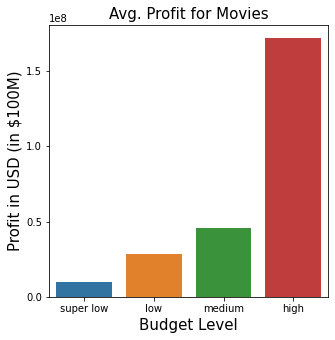

In [28]:
# Compare each of budget category's average profit.

average_profit = tn.groupby('Budget Level')['Profit'].mean()


fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=average_profit.index, y=average_profit.values)
ax.set_title("Avg. Profit for Movies",
             fontsize=15)
ax.set_xlabel("Budget Level", fontsize=15)
ax.set_ylabel("Profit in USD (in $100M)", fontsize=15)
ax.set_yticks(range(0,200000000,50000000))
plt.show()
fig.savefig('bar_budget_profit.png')

In [29]:
# Find average profit for each budget category.


prft_slowbud = tn[tn['Budget Level'] == 'super low']['Profit'].mean()
prft_lowbud = tn[tn['Budget Level'] == 'low']['Profit'].mean()
prft_medbud = tn[tn['Budget Level'] == 'medium']['Profit'].mean()
prft_highbud = tn[tn['Budget Level'] == 'high']['Profit'].mean()

print(f"""
The average profit for different budget categories:
Super-Low-Budget: {round(prft_slowbud, 3)}
Low-Budget:       {round(prft_lowbud, 3)}
Medium-Budget:    {round(prft_medbud, 3)}
High-Budget:      {round(prft_highbud, 3)}
""")





The average profit for different budget categories:
Super-Low-Budget: 9606094.714
Low-Budget:       28661489.014
Medium-Budget:    45887552.541
High-Budget:      171985776.054



In [30]:
# Make a separate copy for future pandas merging purpose.

tmdb_movies_df_copy = tmdb_movies_df

In [31]:
# Ignore this. Just for reference.

tmdb = tmdb_movies_df_copy
genre_id = {28:'Action', 12:'Adventure', 16:'Animation', 35:'Comedy', 80:'Crime',
            99:'Documentary', 18:'Drama', 10751:'Family', 14:'Fantasy', 36:'History',
            27:'Horror', 10402:'Music', 9648:'Mystery', 10749:'Romance',
            878:'Science Fiction', 10770:'TV Movie', 53:'Thriller', 10752:'War',
            37:'Western'}

In [32]:
tmdb['genre_ids'] = tmdb['genre_ids'].apply(lambda x: x if not pd.isna(x) else None)

In [33]:
tmdb = tmdb[pd.notnull(tmdb['genre_ids'])]
tmdb['genre_ids'] = tmdb['genre_ids'].apply(lambda x: ast.literal_eval(x))
tmdb['genre'] = tmdb['genre_ids'].apply(lambda x: [genre_id[g] for g in x])
tmdb['genre'] = tmdb['genre'].apply(lambda x: ', '.join(x))

In [34]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"Adventure, Fantasy, Family"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"Fantasy, Adventure, Animation, Family"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"Adventure, Action, Science Fiction"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"Animation, Comedy, Family"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"Action, Science Fiction, Adventure"
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,"Horror, Drama"
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,"Drama, Thriller"
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,"Fantasy, Action, Adventure"
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,"Family, Adventure, Action"


In [35]:
# Clean tmdb.

selected_columns = ['title', 'popularity', 'release_date', 'vote_average', 'genre']
tmdb_df = tmdb[selected_columns]
tmdb = tmdb_df

tmdb = tmdb.rename(columns = {'title':'Movie', 'release_date':'Year', 'vote_average':'Rating',
                       'genre':'Genre', 'popularity':'Popularity'})


In [36]:
# Clean the data type of applicable columns

tmdb['Year'] =  pd.to_datetime(tmdb['Year'])
tmdb['Year'] = tmdb['Year'].dt.strftime('%Y')

In [37]:
# Merge tn and tmdb and assign it to df.
# Make a copy tntmdb so I can work with it.

df = tn.merge(tmdb, how='left', on=['Year','Movie'])
tntmdb = df.copy()

In [38]:
# Focus only on high budget.

tntmdb = tntmdb[tntmdb['Budget Level'] == 'high']


In [39]:
# Do further cleaning.

tntmdb.dropna(subset = ['Genre'], inplace=True)
tntmdb['Genre'] = tntmdb['Genre'].apply(lambda x: str(x.replace('|',',').replace('and',',').replace(' , ',',')))

In [40]:
# Create an array of genres.

genre_array = tntmdb["Genre"].str.split(",").explode().unique()
genre_array

array(['Drama', ' Music', 'Family', ' Animation', ' Adventure', ' Comedy',
       'Action', ' Family', 'Animation', ' Drama', 'Adventure', 'Comedy',
       ' Fantasy', ' Romance', 'War', ' Action', 'Science Fiction',
       ' Crime', ' Thriller', ' Science Fiction', 'Thriller', 'Crime',
       ' Mystery', 'Mystery', 'Romance', ' War', ' History', ' Horror',
       '', ' Western', 'Fantasy', 'History', 'Western', 'Horror',
       'Documentary', 'Music'], dtype=object)

In [41]:
# Assign to genre_roi_rating the average ROI and rating for each genre.

genre_roi_rating = tntmdb[tntmdb['Genre'].isin(genre_array)].groupby("Genre")["ROI", "Rating"].mean().sort_values(by=['ROI', 'Rating'])
genre_roi_rating.dropna(inplace=True)

genre_roi_rating["ROI"] = genre_roi_rating["ROI"].round(2)
genre_roi_rating["Rating"] = genre_roi_rating["Rating"].round(2)
genre_roi_rating = genre_roi_rating.sort_values(by='Rating', ascending=True)

print(genre_roi_rating)

                  ROI  Rating
Genre                        
Horror          -0.05    5.70
Comedy           1.66    5.82
                 4.13    6.00
Action           1.43    6.10
Science Fiction -0.22    6.30
Adventure        2.26    6.90
Drama            2.44    7.18
Documentary      1.71    7.50


<ipython-input-41-3f6ee49fa558>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_roi_rating = tntmdb[tntmdb['Genre'].isin(genre_array)].groupby("Genre")["ROI", "Rating"].mean().sort_values(by=['ROI', 'Rating'])


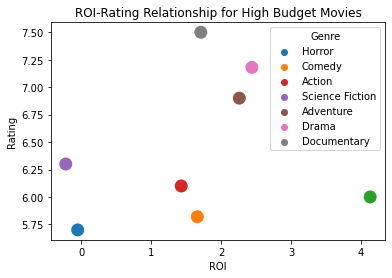

In [42]:
# Graph it on a scatterplot and make observations

fig,ax=plt.subplots()
sns.scatterplot(x='ROI', y='Rating', hue='Genre', data=genre_roi_rating, s=200)
plt.title("ROI-Rating Relationship for High Budget Movies")
plt.show()


In [43]:
# Assign to genre_roi_popularity the average ROI and popularity for each genre.

genre_roi_popularity = tntmdb[tntmdb['Genre'].isin(genre_array)].groupby("Genre")["ROI", "Popularity"].mean().sort_values(by=['ROI', 'Popularity'])
genre_roi_popularity.dropna(inplace=True)

genre_roi_popularity["ROI"] = genre_roi_popularity["ROI"].round(2)
genre_roi_popularity["Popularity"] = genre_roi_popularity["Popularity"].round(2)
genre_roi_popularity = genre_roi_popularity.sort_values(by='Popularity', ascending=True)

print(genre_roi_popularity)

                  ROI  Popularity
Genre                            
Documentary      1.71        0.60
                 4.13        0.60
Comedy           1.66       12.82
Horror          -0.05       14.03
Drama            2.44       18.80
Science Fiction -0.22       25.20
Action           1.43       26.23
Adventure        2.26       48.51


<ipython-input-43-a3498572b0fe>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_roi_popularity = tntmdb[tntmdb['Genre'].isin(genre_array)].groupby("Genre")["ROI", "Popularity"].mean().sort_values(by=['ROI', 'Popularity'])


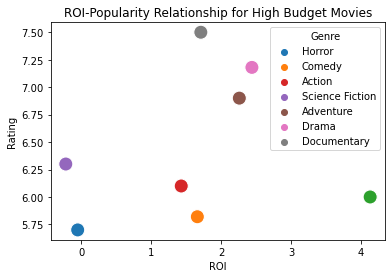

In [44]:
# Graph it on a scatterplot and make observations

fig,ax=plt.subplots()
sns.scatterplot(x='ROI', y='Rating', hue='Genre', data=genre_roi_rating, s=200)
plt.title("ROI-Popularity Relationship for High Budget Movies")
plt.show()


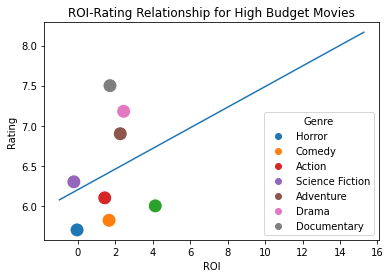

In [45]:
# Graph ROI-Rating scatterplot again with a regression line of ROI and Rating.
# Save the graph.

fig,ax=plt.subplots()

x_axis = tntmdb[tntmdb['Budget Level'] == 'high']['ROI']
y_axis = tntmdb[tntmdb['Budget Level'] == 'high']['Rating']
slope,intercept,r_value,p_value,std_err = linregress(x_axis, y_axis)
line = [slope*xi + intercept for xi in x_axis]

sns.scatterplot(x='ROI', y='Rating', hue='Genre', data=genre_roi_rating, s=200)
plt.title("ROI-Rating Relationship for High Budget Movies")
plt.plot(x_axis, line)
plt.show()

fig.savefig('roi_rating_genre_scatter.png')

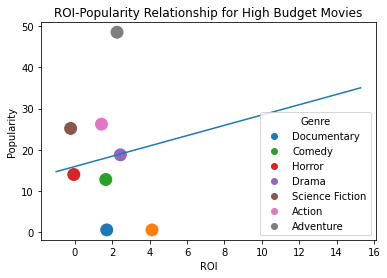

In [46]:
# Graph ROI-Popularity scatterplot again with a regression line of ROI and Rating.
# Save the graph.

fig,ax=plt.subplots()

x_axis = tntmdb[tntmdb['Budget Level'] == 'high']['ROI']
y_axis = tntmdb[tntmdb['Budget Level'] == 'high']['Popularity']
slope,intercept,r_value,p_value,std_err = linregress(x_axis, y_axis)
line = [slope*xi + intercept for xi in x_axis]

sns.scatterplot(x='ROI', y='Popularity', hue='Genre', data=genre_roi_popularity, s=200)
plt.title("ROI-Popularity Relationship for High Budget Movies")
plt.plot(x_axis, line)
plt.show()

fig.savefig('roi_popularity_genre_scatter.png')

In [47]:
# Three Recommendations to Microsoft:

# 1. Focus only on making high-budget original contents.
#    Magitude of success will be greater while risk of failure will be significantly lower

# 2. Within high-budget contents, increasing budget generally yields greater return ratio. 
#    When faced with a decision of making more investment for clear better content, go for it.

# 3. Success and failure of a movie in a streaming platform cannot be measured by its individual financial performance alone. 
#.   Some high-quality contents make views return to the platform and spend more time.
#.   Documentary is an example of such category. See it as a form of investment despite poor ROI. 